In [ ]:
# Importing Library

import tensorflow as tf

from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Mounting Google Drive

from google.colab import drive
drive.mount('drive/')

Mounted at drive/


In [ ]:
# Generating Train Data and Test Data

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [ ]:
# Generating Directory for Data

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/CNN/Image Dataset/Train',
                                                    target_size=(200, 200),
                                                    batch_size=3,
                                                    class_mode='categorical',
                                                    shuffle=True)

test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/CNN/Image Dataset/Test',
                                                  target_size=(200, 200),
                                                  batch_size=3,
                                                  class_mode='categorical',
                                                  shuffle=True)

Found 150 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [ ]:
# Creating a Sequential Model and Adding The Layers

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')                           
])

In [ ]:
# Compiling Model

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adagrad(learning_rate=0.03),
              metrics=['accuracy'])

In [ ]:
# Fitting Model
 
history = model.fit(
      train_generator,
      epochs=8,
      validation_data=test_generator,
      validation_steps=5,
    )

Epoch 1/8
50/50 [==============================] - 4s 84ms/step - loss: 0.6620 - accuracy: 0.7200 - val_loss: 0.9429 - val_accuracy: 0.6000
Epoch 2/8
50/50 [==============================] - 3s 66ms/step - loss: 0.6272 - accuracy: 0.7200 - val_loss: 0.8330 - val_accuracy: 0.6667
Epoch 3/8
50/50 [==============================] - 5s 97ms/step - loss: 0.5240 - accuracy: 0.8000 - val_loss: 0.6663 - val_accuracy: 0.7333
Epoch 4/8
50/50 [==============================] - 3s 69ms/step - loss: 0.5592 - accuracy: 0.7733 - val_loss: 0.5134 - val_accuracy: 0.7333
Epoch 5/8
50/50 [==============================] - 3s 70ms/step - loss: 0.5562 - accuracy: 0.7933 - val_loss: 0.6518 - val_accuracy: 0.6667
Epoch 6/8
50/50 [==============================] - 4s 79ms/step - loss: 0.4388 - accuracy: 0.8467 - val_loss: 0.8549 - val_accuracy: 0.6000
Epoch 7/8
50/50 [==============================] - 3s 69ms/step - loss: 0.4389 - accuracy: 0.8400 - val_loss: 1.0102 - val_accuracy: 0.5333
Epoch 8/8
50/50 [===

In [ ]:
# Importing Additional Library

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [ ]:
# Displaying Model Training History and Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy').set_color('Black')
plt.ylabel('Accuracy').set_color('Black')
plt.xlabel('Epoch').set_color('Black')
plt.legend(['Train', 'Test'], loc='center right')
plt.show()

# Summarizing history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss').set_color('Black')
plt.ylabel('Loss').set_color('Black')
plt.xlabel('Epoch').set_color('Black')
plt.legend(['Train', 'Test'], loc='center right')
plt.show()

In [ ]:
# Importing Files for Upload Process
from google.colab import files

Saving 149496-nature-animals-bears-forest-trees-playing-baby_animals.jpg to 149496-nature-animals-bears-forest-trees-playing-baby_animals.jpg
149496-nature-animals-bears-forest-trees-playing-baby_animals.jpg
Foto Alam Suasana Pantai


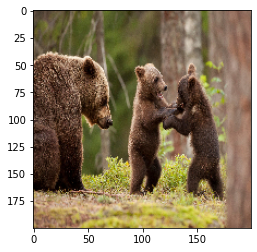

In [ ]:
# Uploading Image and Making a Prediction
 
file_upload = files.upload()
 
for name in file_upload.keys():
 
  path = name
  img = image.load_img(path, target_size=(200,200))
  imgplot = plt.imshow(img)
  array_image = image.img_to_array(img)
  array_image = np.expand_dims(array_image, axis=0)
 
  images = np.vstack([array_image])
  predict_classes = model.predict(images, batch_size=3)
  print(name)
  predict_classes = predict_classes.tolist()
  if predict_classes[0][0]==1:
    print('Foto Air Terjun, Sungai, dan Danau')
  elif predict_classes[0][1]==1:
    print('Foto Alam dan Binatang')
  else:
    print('Foto Alam Suasana Pantai')